In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os
from pysal.esda.mapclassify import Quantiles, Equal_Interval

/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
nums_to_months = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        0: "December"}

In [3]:
# set the filepath and load in a shapefile
fp = "BEL_adm/BEL_adm0.shp"
map_df = gpd.read_file(fp).set_index('NAME_0')

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
NAME_0,,,,,,,,,,,,,,,,,,,,,
Belgium,23,BEL,19,BEL,Belgium,BELGIUM,Belgium,Belgique|Belgie|Belgien,None,Belgique|Belgien|Belgium,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(POLYGON ((3.365832090377808 51.36654663085955...


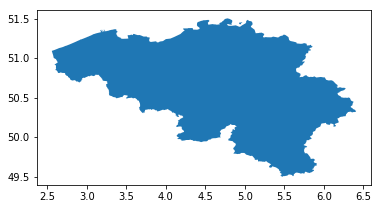

In [4]:
map_df.plot()

In [5]:
df = pd.read_csv("BEL_ER_Interest.csv", header=0)

columns_temp = ['NAME_0']
for i in range(1,59):
    columns_temp.append('Month_'+str(i))
    
print(columns_temp)

df.columns = columns_temp
df.head()

['NAME_0', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Month_13', 'Month_14', 'Month_15', 'Month_16', 'Month_17', 'Month_18', 'Month_19', 'Month_20', 'Month_21', 'Month_22', 'Month_23', 'Month_24', 'Month_25', 'Month_26', 'Month_27', 'Month_28', 'Month_29', 'Month_30', 'Month_31', 'Month_32', 'Month_33', 'Month_34', 'Month_35', 'Month_36', 'Month_37', 'Month_38', 'Month_39', 'Month_40', 'Month_41', 'Month_42', 'Month_43', 'Month_44', 'Month_45', 'Month_46', 'Month_47', 'Month_48', 'Month_49', 'Month_50', 'Month_51', 'Month_52', 'Month_53', 'Month_54', 'Month_55', 'Month_56', 'Month_57', 'Month_58']


,NAME_0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,Month_49,Month_50,Month_51,Month_52,Month_53,Month_54,Month_55,Month_56,Month_57,Month_58
0,Belgium,5,4,3,3,4,3,3,5,4,...,92,100,97,95,76,74,63,93,81,76


In [6]:
merged = map_df.join(df.set_index('NAME_0'))
merged.head()

,ID_0,ISO,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,...,Month_49,Month_50,Month_51,Month_52,Month_53,Month_54,Month_55,Month_56,Month_57,Month_58
NAME_0,,,,,,,,,,,,,,,,,,,,,
Belgium,23,BEL,19,BEL,Belgium,BELGIUM,Belgium,Belgique|Belgie|Belgien,None,Belgique|Belgien|Belgium,...,92,100,97,95,76,74,63,93,81,76


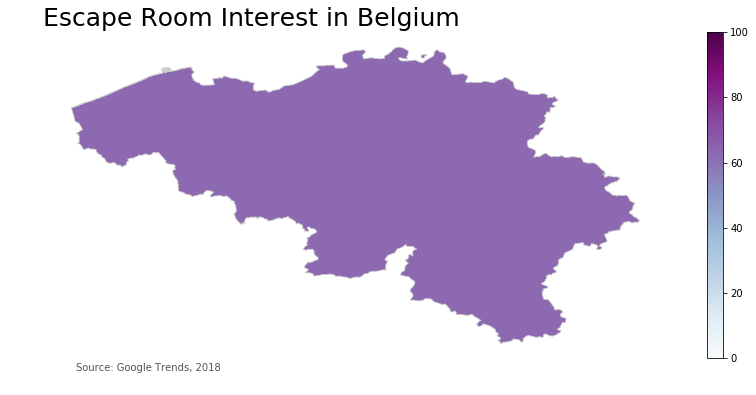

In [7]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Month_55'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14, 6))

# create map
merged.plot(column=variable, cmap='BuPu', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Escape Room Interest in Belgium', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3',}, loc='left')

# create an annotation for the  data source
ax.annotate('Source: Google Trends, 2018',
           xy=(0.1, .08), xycoords='figure fraction', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

fig.savefig('testmap.png', dpi=300)

In [8]:
merged.head()

,ID_0,ISO,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,...,Month_49,Month_50,Month_51,Month_52,Month_53,Month_54,Month_55,Month_56,Month_57,Month_58
NAME_0,,,,,,,,,,,,,,,,,,,,,
Belgium,23,BEL,19,BEL,Belgium,BELGIUM,Belgium,Belgique|Belgie|Belgien,None,Belgique|Belgien|Belgium,...,92,100,97,95,76,74,63,93,81,76


In [9]:
merged.fillna(0, inplace=True)

#for i in range(1,57):
#    merged["Month_{x}".format(x=(i+1))] = (merged["Month_{x}".format(x=(i))] + merged["Month_{x}".format(x=(i+1))] + merged["Month_{x}".format(x=(i+2))])/3

merged.head()

,ID_0,ISO,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,...,Month_49,Month_50,Month_51,Month_52,Month_53,Month_54,Month_55,Month_56,Month_57,Month_58
NAME_0,,,,,,,,,,,,,,,,,,,,,
Belgium,23,BEL,19,BEL,Belgium,BELGIUM,Belgium,Belgique|Belgie|Belgien,0,Belgique|Belgien|Belgium,...,92,100,97,95,76,74,63,93,81,76


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


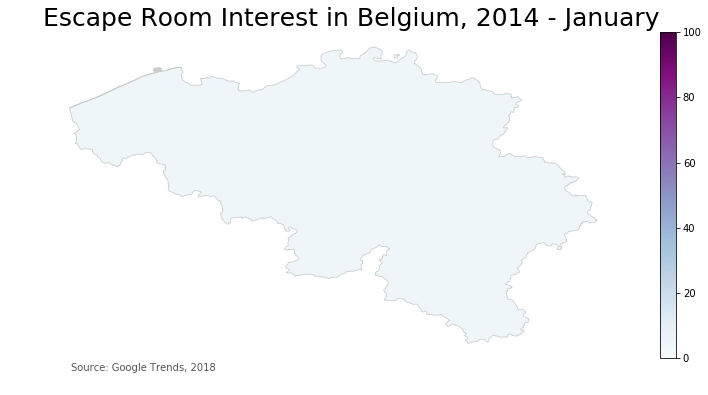

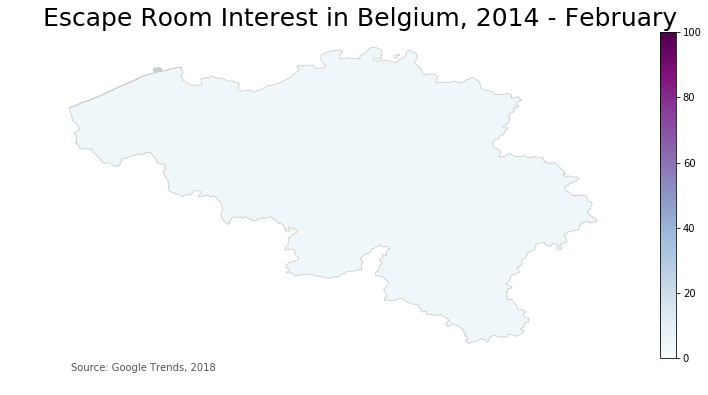

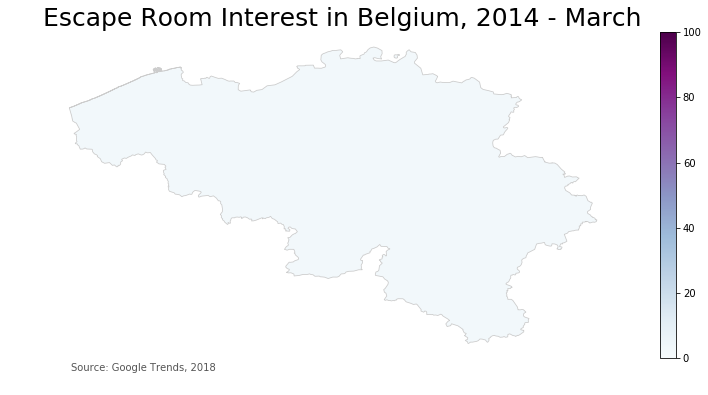

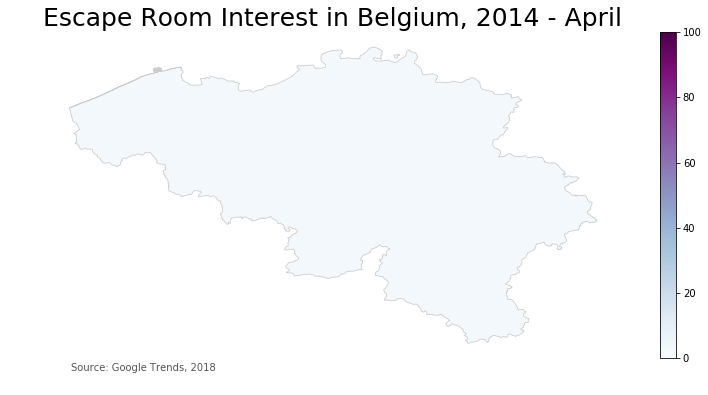

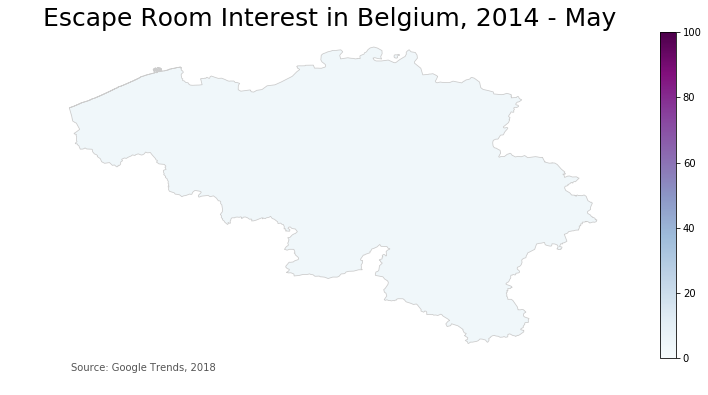

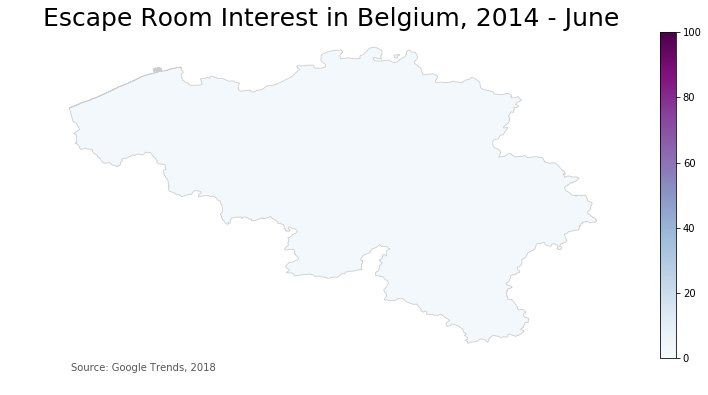

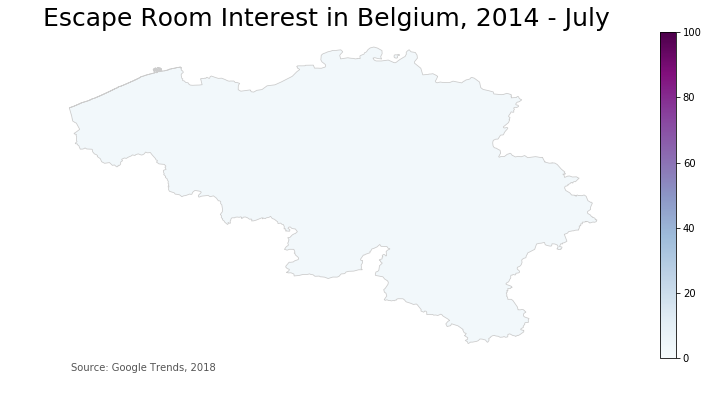

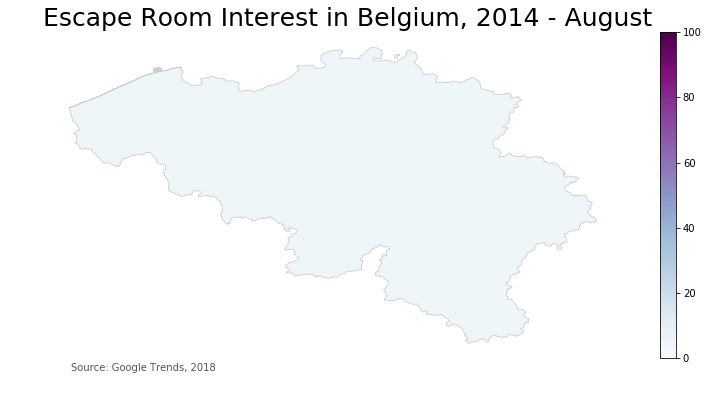

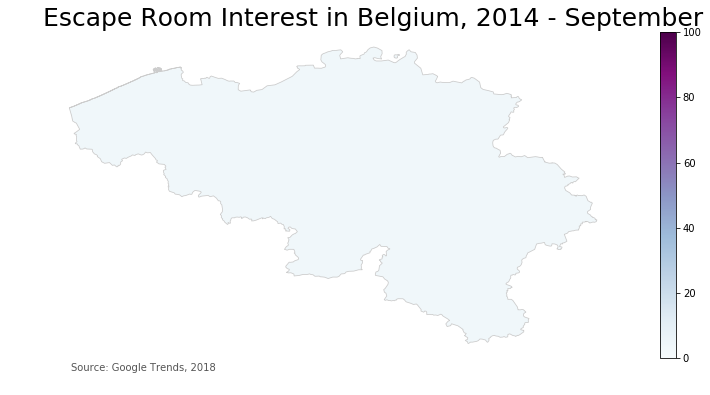

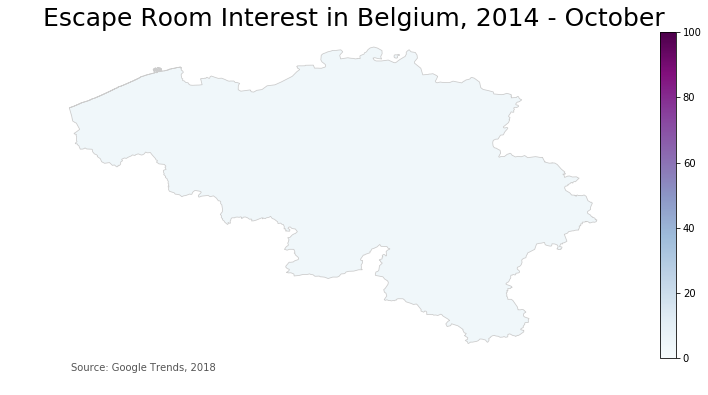

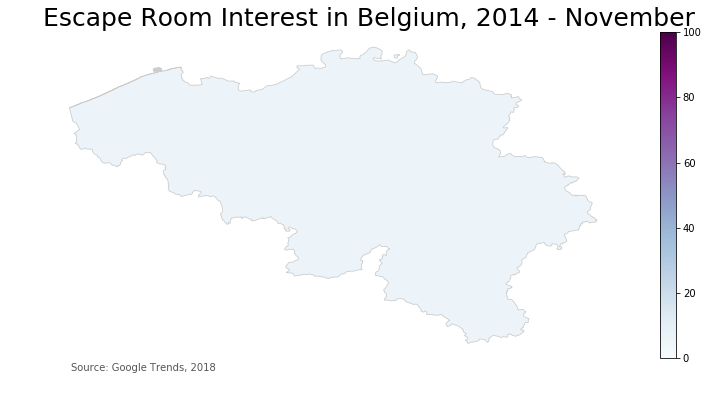

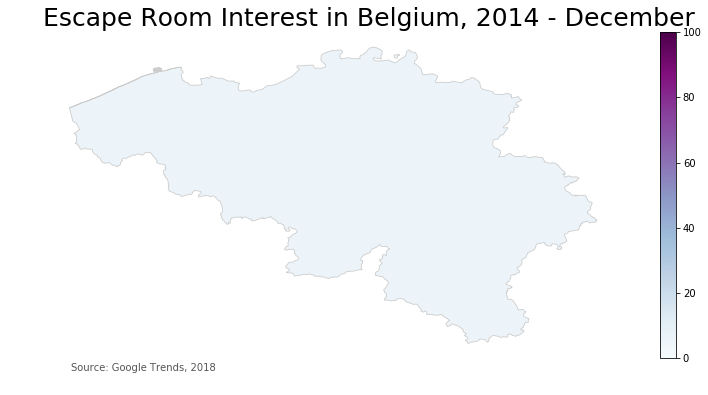

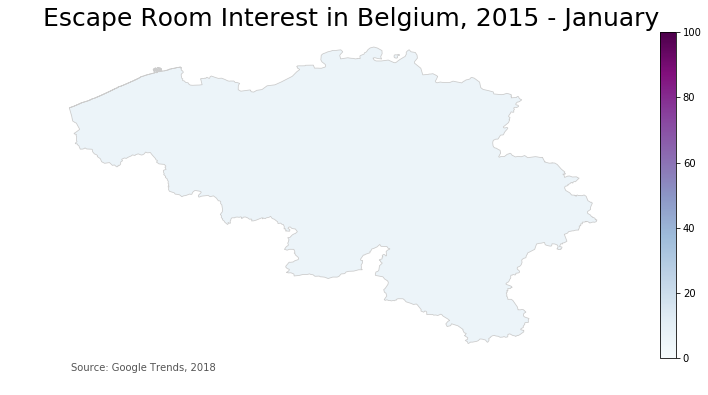

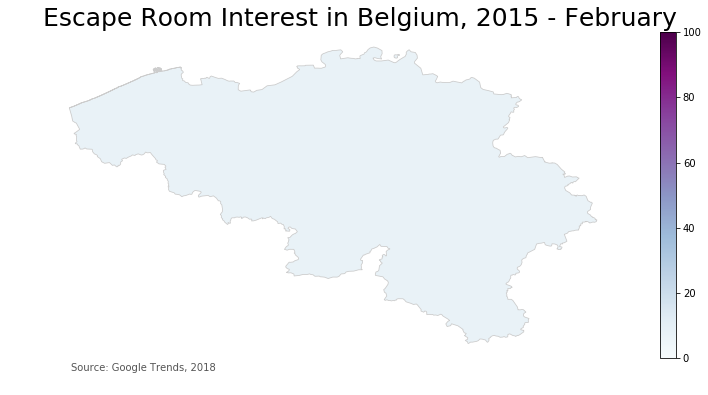

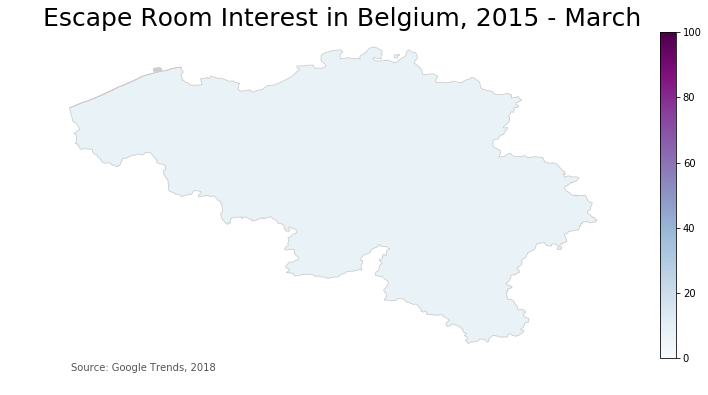

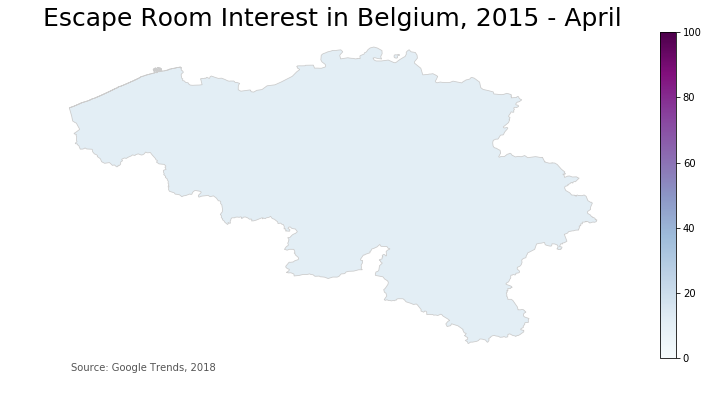

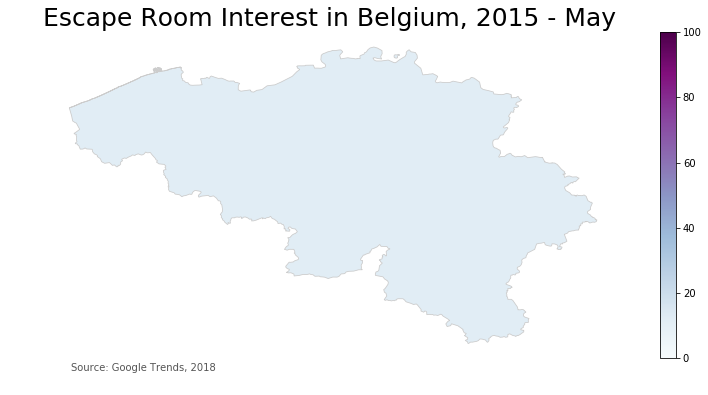

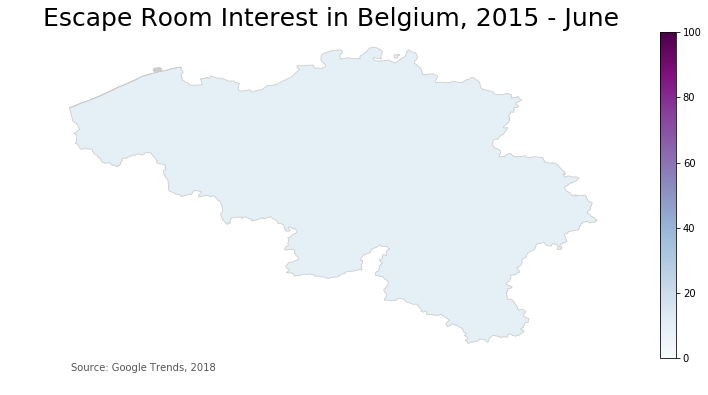

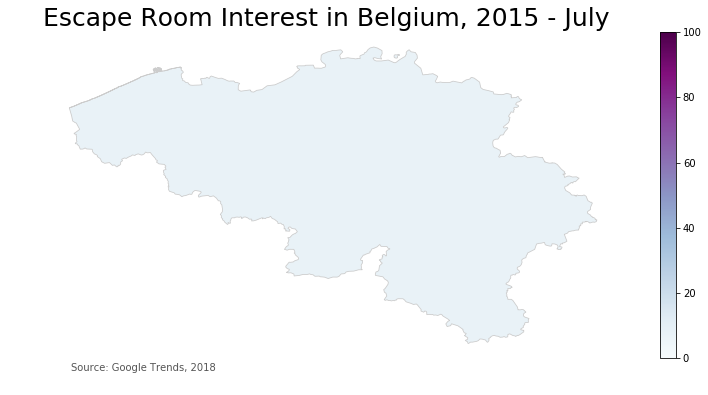

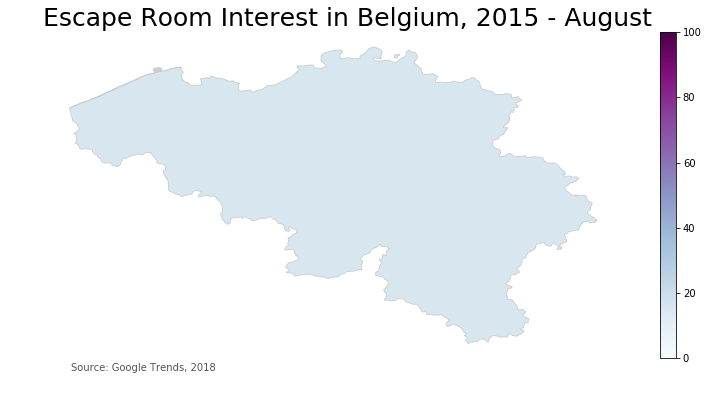

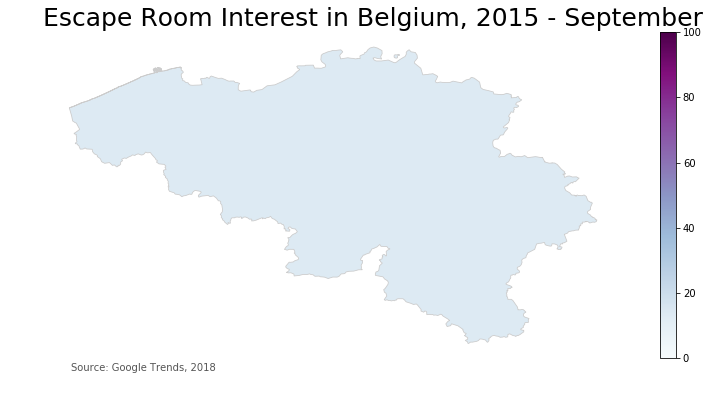

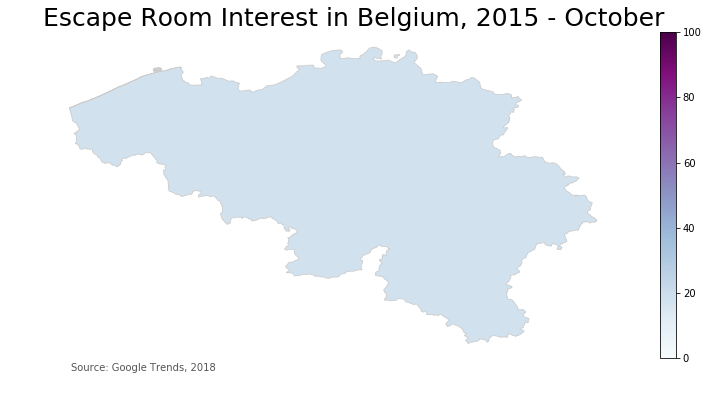

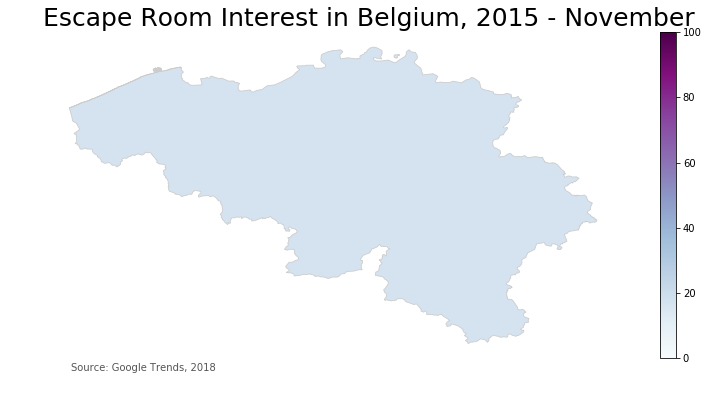

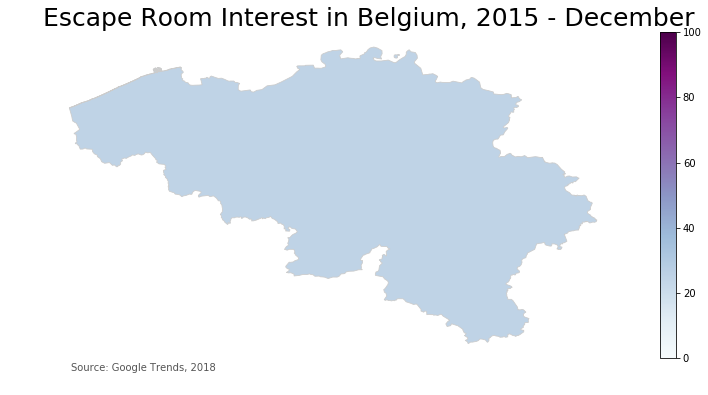

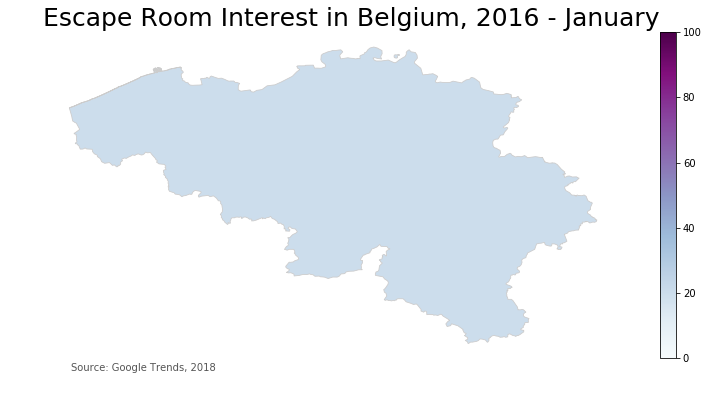

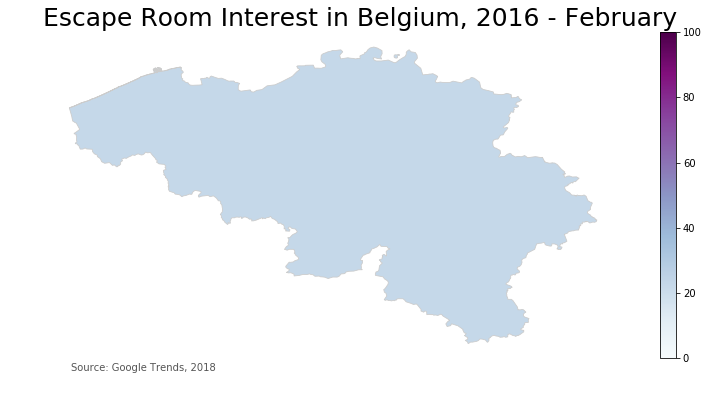

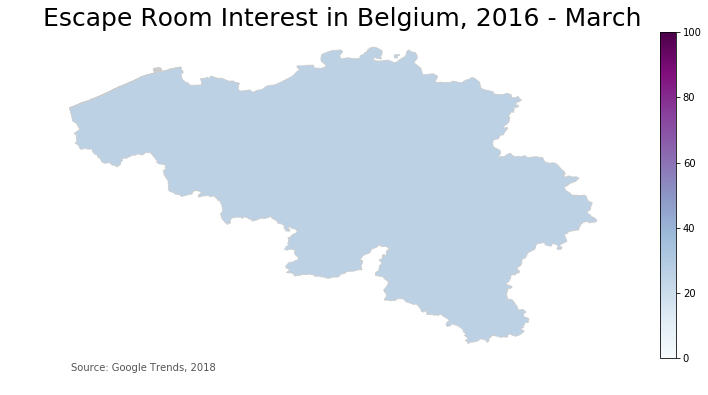

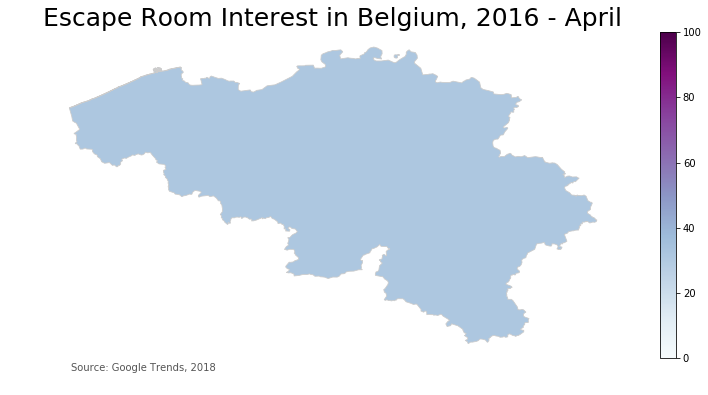

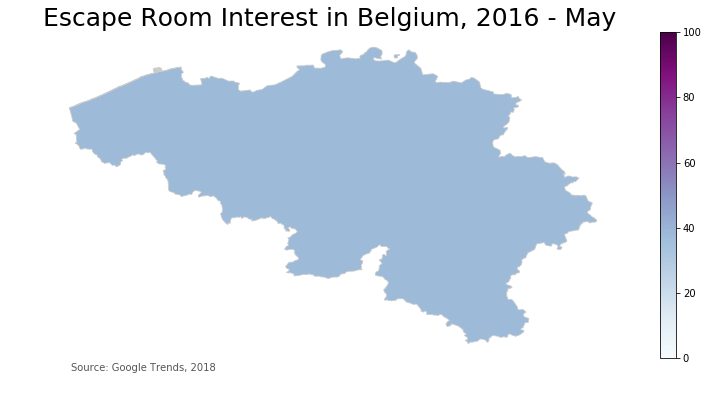

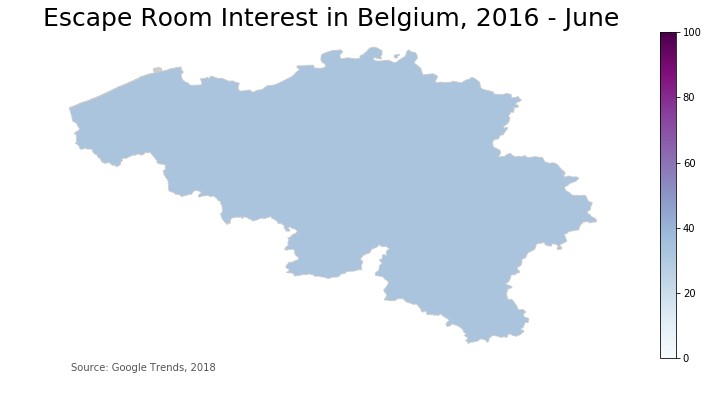

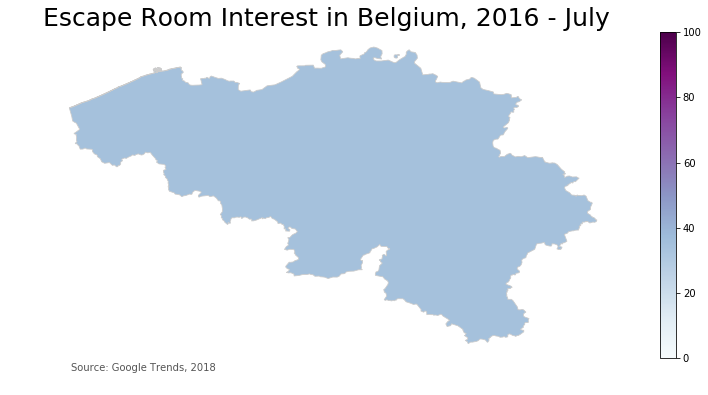

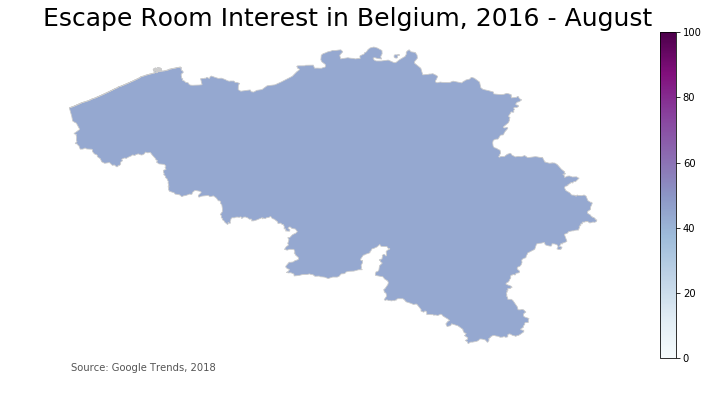

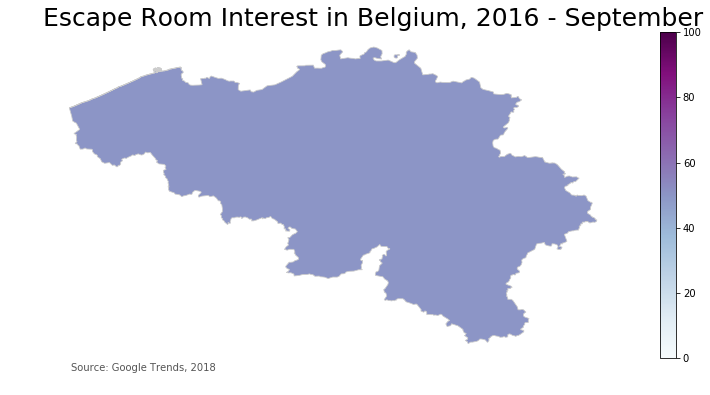

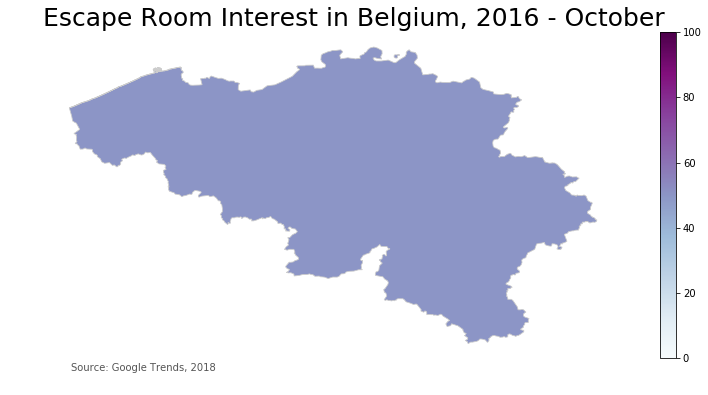

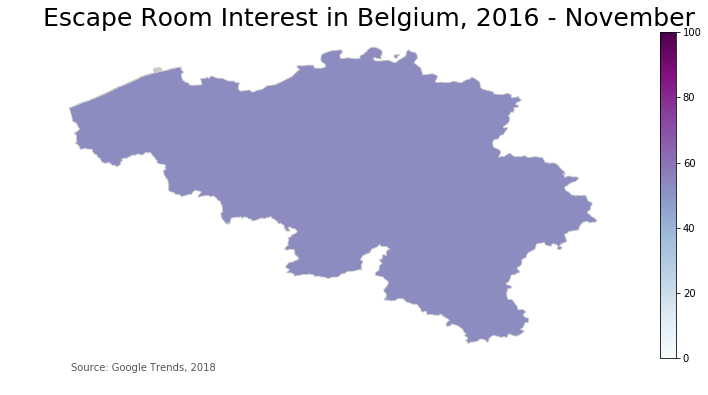

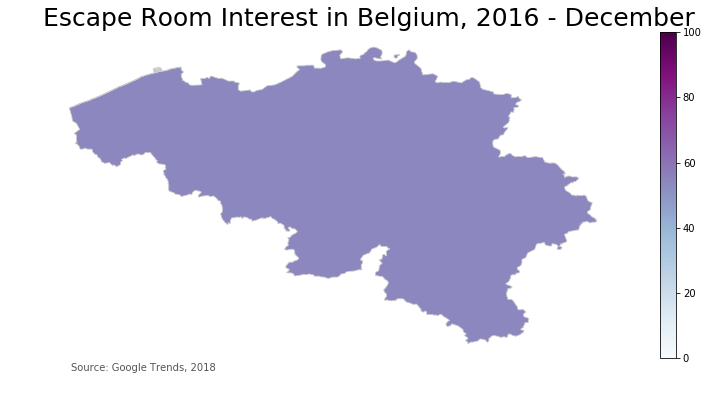

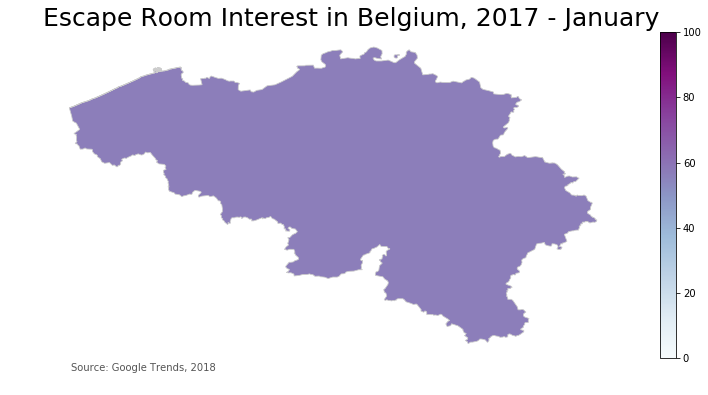

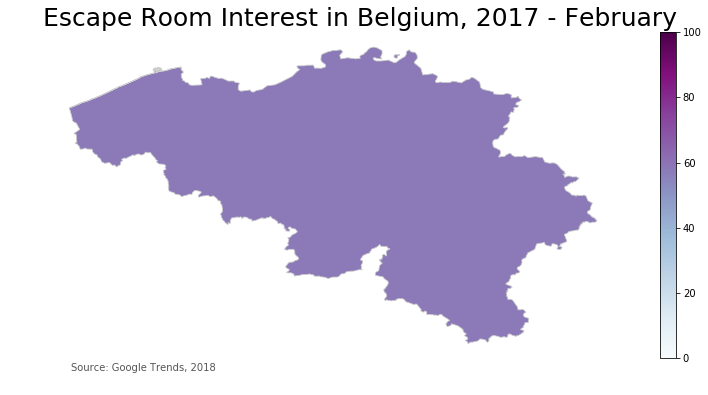

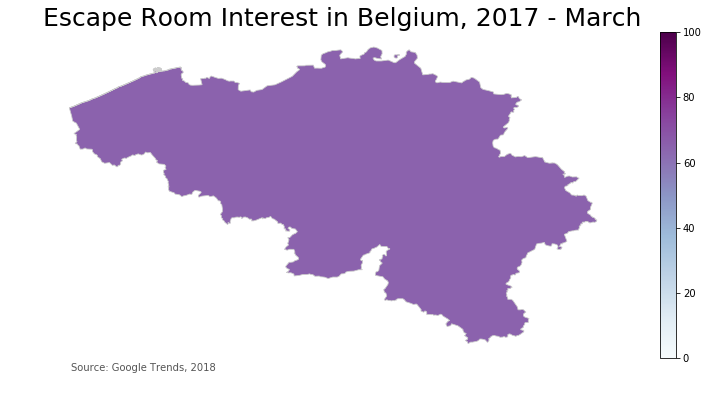

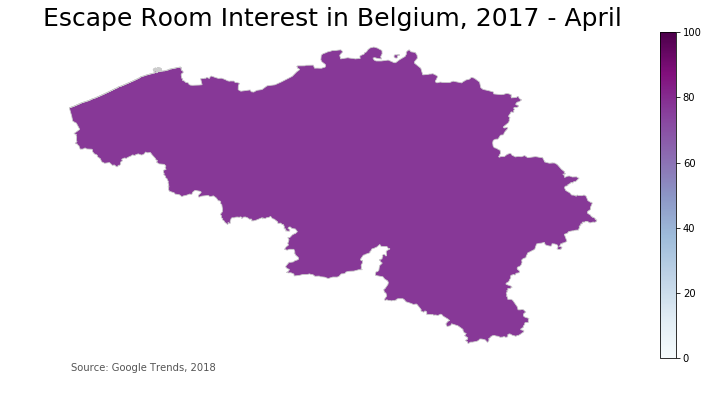

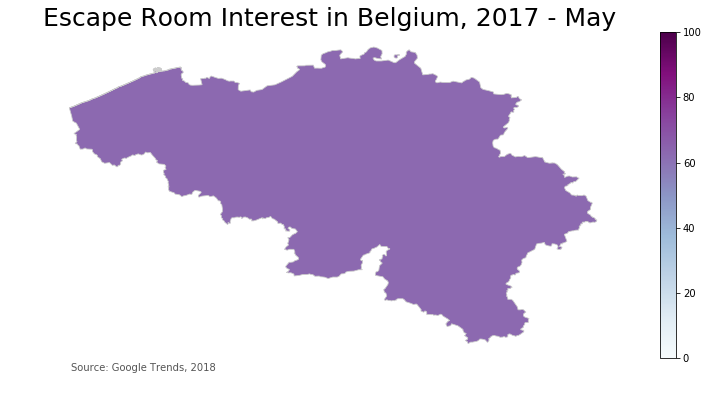

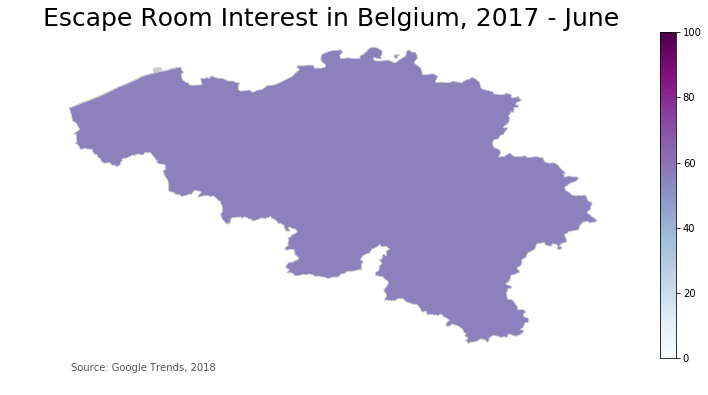

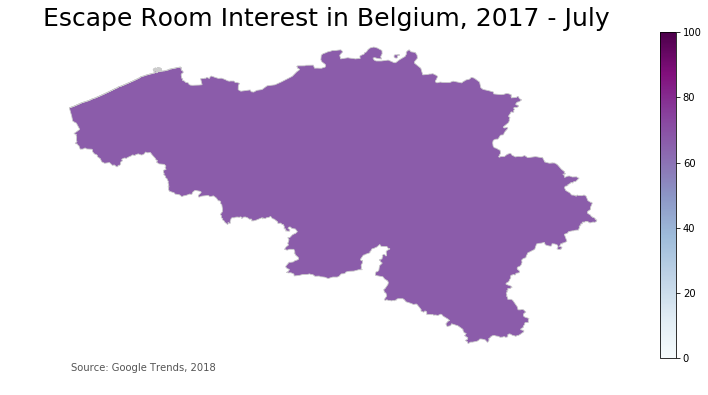

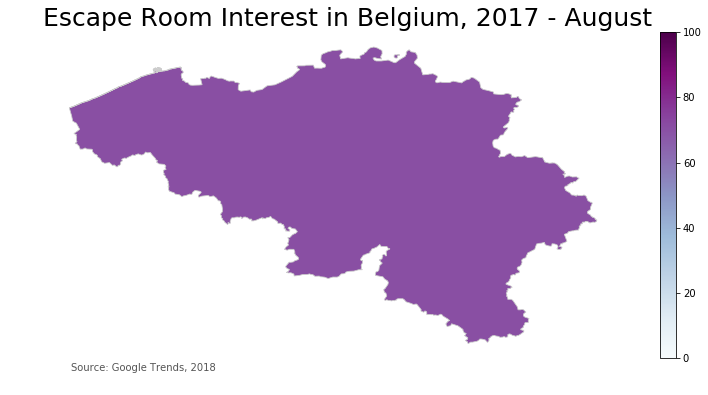

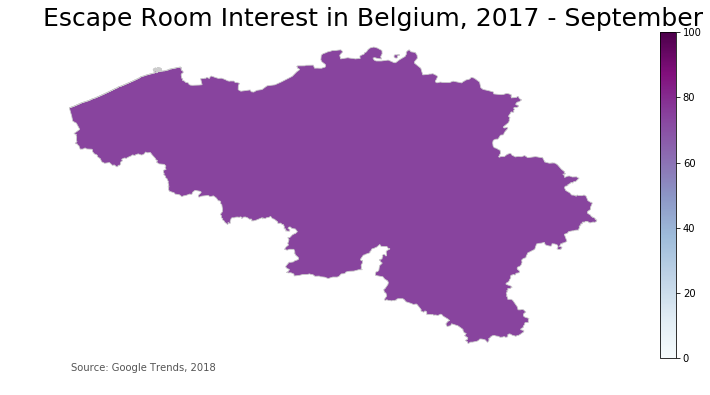

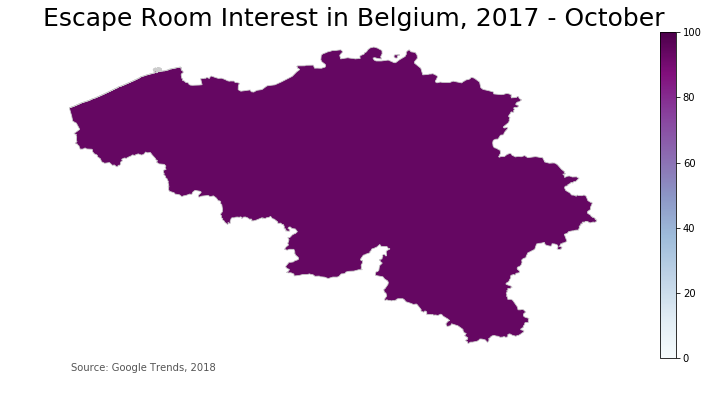

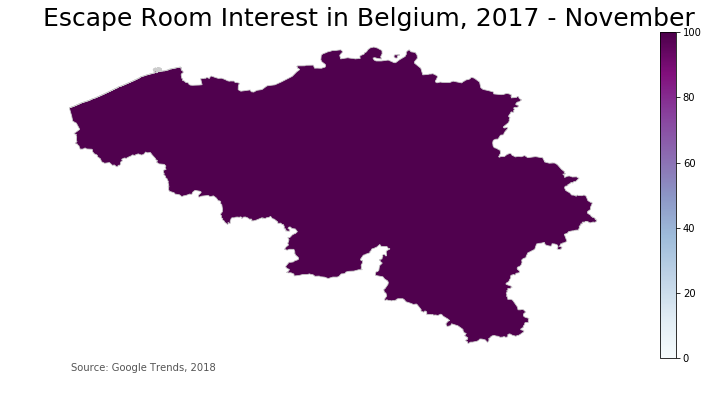

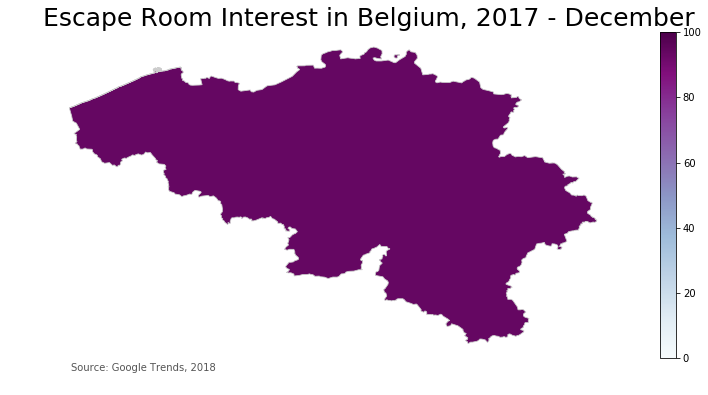

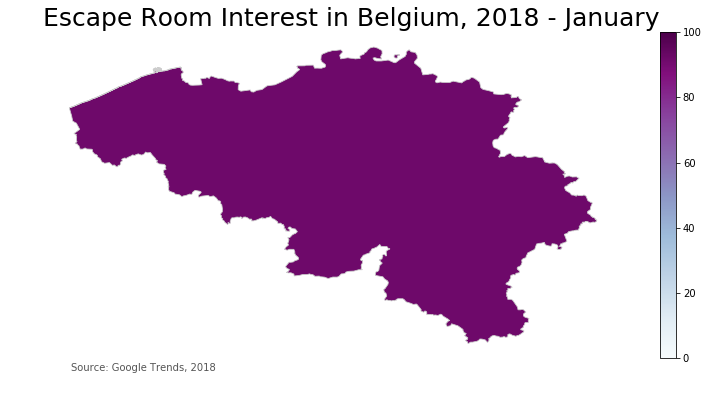

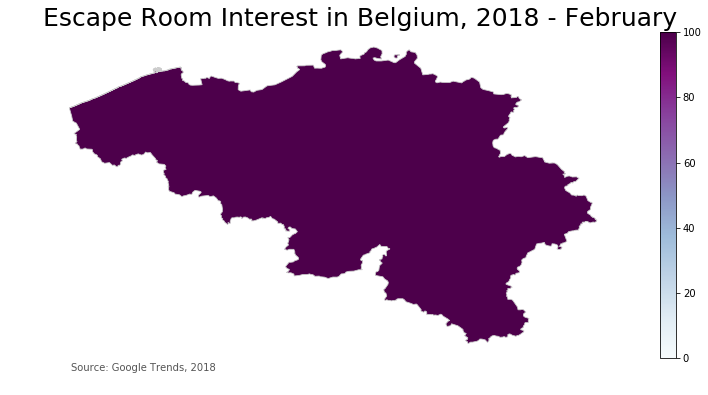

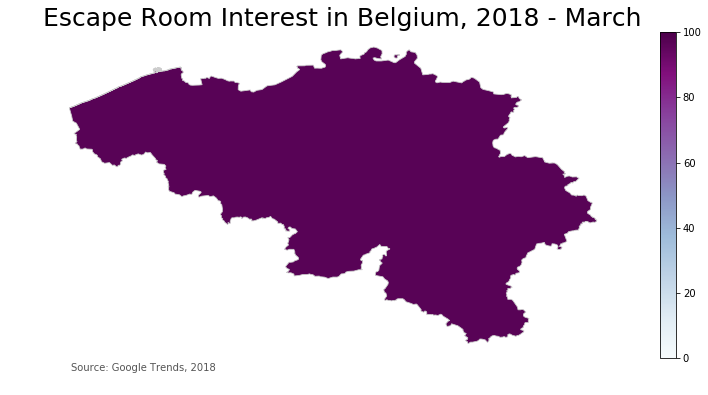

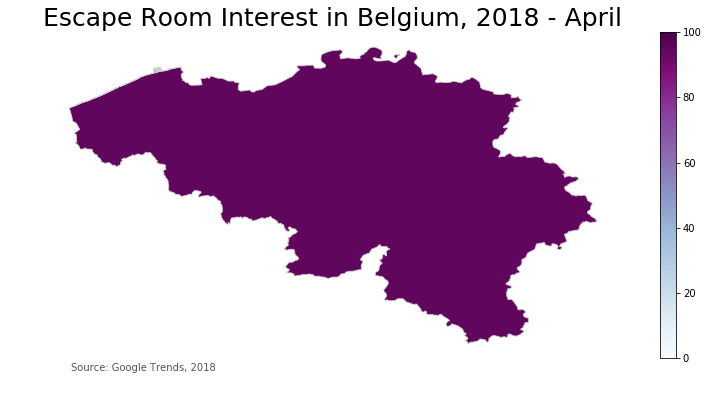

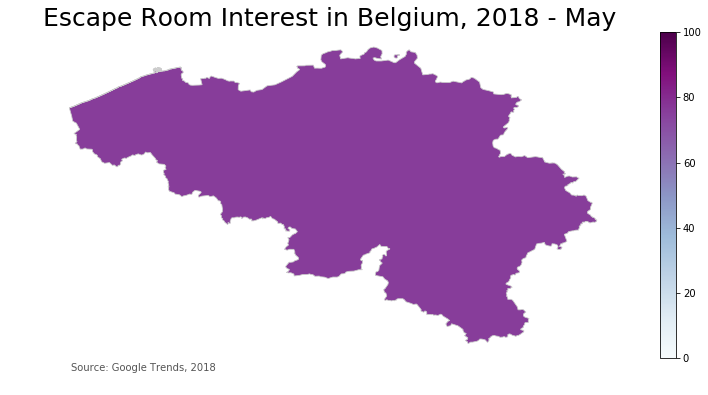

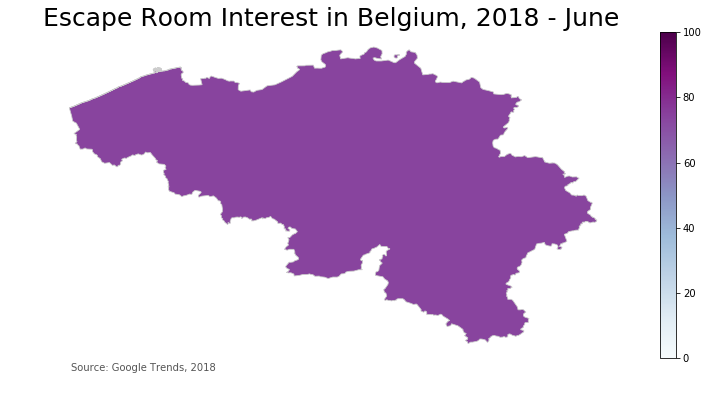

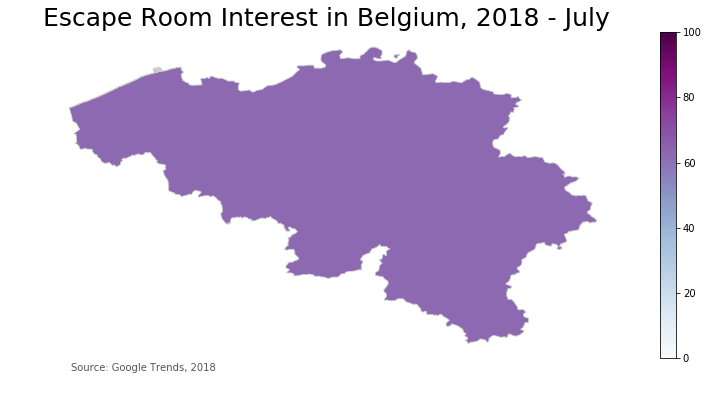

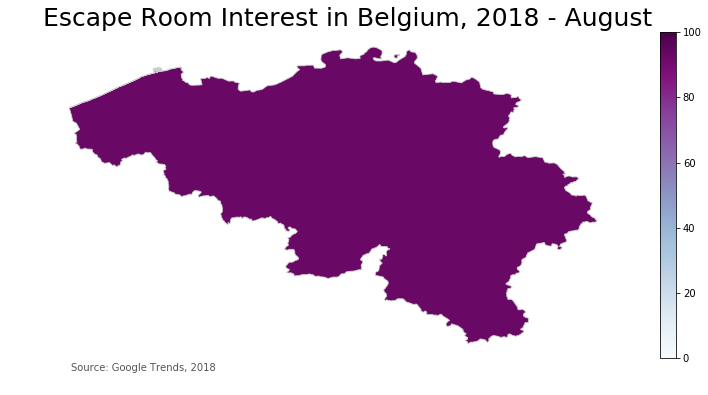

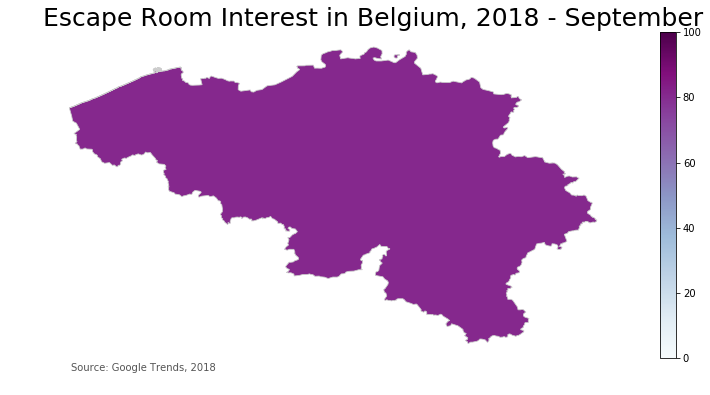

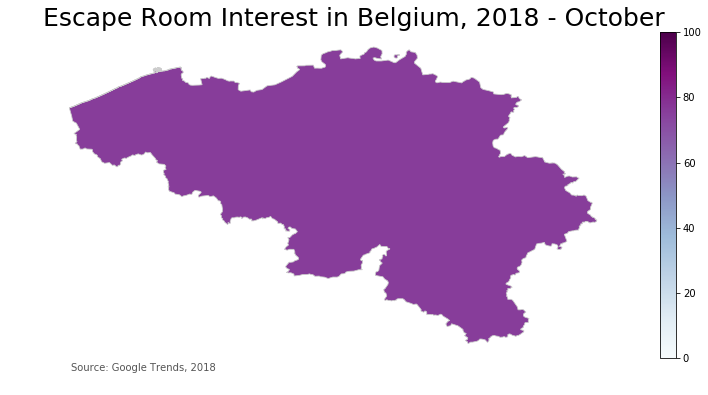

In [10]:
list_of_months = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Month_13', 'Month_14', 'Month_15', 'Month_16', 'Month_17', 'Month_18',
       'Month_19', 'Month_20', 'Month_21', 'Month_22', 'Month_23', 'Month_24',
       'Month_25', 'Month_26', 'Month_27', 'Month_28', 'Month_29', 'Month_30',
       'Month_31', 'Month_32', 'Month_33', 'Month_34', 'Month_35', 'Month_36',
       'Month_37', 'Month_38', 'Month_39', 'Month_40', 'Month_41', 'Month_42',
       'Month_43', 'Month_44', 'Month_45', 'Month_46', 'Month_47', 'Month_48',
       'Month_49', 'Month_50', 'Month_51', 'Month_52', 'Month_53', 'Month_54',
       'Month_55', 'Month_56', 'Month_57', 'Month_58']

# set the range for the choropleth
vmin, vmax = 0, 100
    
for i in range(len(list_of_months)):

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(13, 6))

    # create map
    merged.plot(column=list_of_months[i], cmap='BuPu', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # remove the axis
    ax.axis('off')
    
    year = int(i/12) + 2014
    month = nums_to_months.get((i+1)%12)
    
    # add a title
    ax.set_title('Escape Room Interest in Belgium, ' + str(year)  + ' - ' + str(month), \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'}, loc='left')

    # create an annotation for the  data source
    ax.annotate('Source: Google Trends, 2018',
               xy=(0.1, .08), xycoords='figure fraction',
               horizontalalignment='left', verticalalignment='top',
               fontsize=10, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

    # this will save the figure as a high-res png. you can also save as svg
    fig.savefig('Take_2/'+list_of_months[i]+'.png', dpi=100)